# Predicting House Sale Price
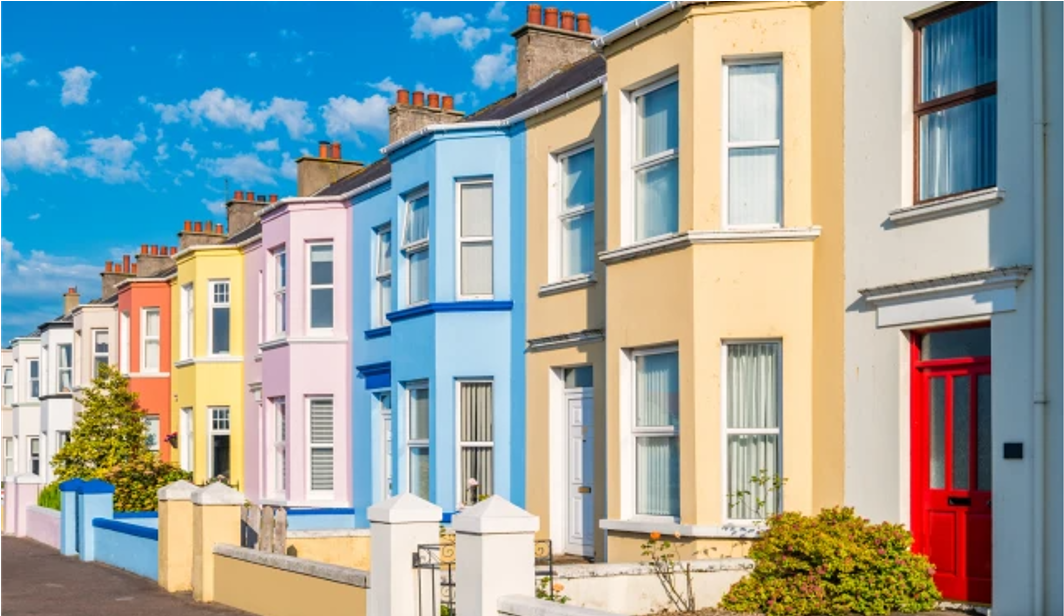


In this project we will work with housing data for the city of Ames,lowa, the USA from 2006 to 2010 to predict house sale prices using a machine learning linear regresson model. You can find information about data collection __[here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)__ and the column description __[here](https://s3.amazonaws.com/dq-content/307/data_description.txt)__.

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

houses = pd.read_csv("AmesHousing.tsv",  delimiter ='\t')
pd.set_option('max_columns', houses.shape[1])
pd.set_option('display.max_rows', None)

print("Number of houses :", houses.shape[0])
print("Number of features :", houses.shape[1])



Number of houses : 2930
Number of features : 82


In [2]:
missing_values = houses.isnull().sum()*100/len(houses)

print("Columns with missing values, in % :\n \n",missing_values[missing_values > 0].sort_values(ascending = False))

Columns with missing values, in % :
 
 Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
Garage Cars        0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
BsmtFin SF 1       0.034130
Electrical         0.034130
dtype: float64


In [3]:
print("columns :\n\n" , houses.columns)

houses.head()

columns :

 Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Feature Engineering

By observing the above cells and referrring to __[data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt)__, lets do some cleaning and wrangling of our data.We will remove the columns with more than 5% missing values.Here the elected cutoff 5% is tntative.

In [4]:
drop_features = missing_values[missing_values > 5].index
transformed_houses = houses.drop(drop_features, axis =1)

print("No. of remaining features:", transformed_houses.shape[1])

missing_values = missing_values[(missing_values >0) &(missing_values <=5)]

print("\nRemaining features with missing values (<= 5%) \n\n", missing_values)

No. of remaining features: 71

Remaining features with missing values (<= 5%) 

 Mas Vnr Type      0.784983
Mas Vnr Area      0.784983
Bsmt Qual         2.730375
Bsmt Cond         2.730375
Bsmt Exposure     2.832765
BsmtFin Type 1    2.730375
BsmtFin SF 1      0.034130
BsmtFin Type 2    2.764505
BsmtFin SF 2      0.034130
Bsmt Unf SF       0.034130
Total Bsmt SF     0.034130
Electrical        0.034130
Bsmt Full Bath    0.068259
Bsmt Half Bath    0.068259
Garage Cars       0.034130
Garage Area       0.034130
dtype: float64


For the remaining features with missing values(<5%), let's fill the missing value with the most frequent value from the corresponding feature.

In [5]:
transformed_houses = transformed_houses.fillna(transformed_houses.mode().to_dict(orient = 'records' )[0])


The features **Yr Sold** , **Year Remod/Add** and **Year Built** are not so informative.We are interested only in the number of years passed after each house was built and remodeled.So, let's create features that can capture important information.

In [6]:
transformed_houses["years_after_built"] = transformed_houses["Yr Sold"] - transformed_houses["Year Built"]
transformed_houses["years_after_remod"] = transformed_houses["Yr Sold"] - transformed_houses["Year Remod/Add"]

print(transformed_houses["years_after_built"].min())
print(transformed_houses["years_after_remod"].min())

-1
-2


Here some of the values of years are negative, let's remove them.

In [7]:
neg_feature = transformed_houses[(transformed_houses["years_after_built"] <0) | ((transformed_houses["years_after_remod"] <0))]
transformed_houses = transformed_houses.drop(neg_feature.index , axis =0).reset_index(drop =True)

print("No of remaining features:", transformed_houses.shape[1])
print("No of remaining rows:", transformed_houses.shape[0])


No of remaining features: 73
No of remaining rows: 2927


Only 3 rows had negative values and they are removed.

Now let's remove the features :
* **Order**, **PID** - as they are not useful for machine learning model.
* **Yr Sold**, **Year Built**, **Year Remod/Add** - as they are already used for creating new features.
* **MO Sold**, **Sale Type**, **Sale Condition** - as they leak information about the sale.

In [8]:
not_necessary_feat = ["Order" ,"PID","Yr Sold","Year Remod/Add","Year Built","Sale Type",'Sale Condition',
                     "Mo Sold"]
transformed_houses = transformed_houses.drop(not_necessary_feat, axis =1)

print("No of remaining features:", transformed_houses.shape[1])

No of remaining features: 65


Let's gather all the steps of feature engineering into one  function making it more flexible for different cutoff values.

In [9]:
def transform_features(df = houses , nan_cutoff =5) :
    # missing values calculation in %
    missing_values = houses.isnull().sum()*100/len(houses)
    
    #Removing the features with missing values greater than given cutoff
    drop_features = missing_values[missing_values > 5].index
    df = df.drop(drop_features, axis =1)
    
    # Filling the remaining missing values with the first mode value of the corresponding feature
    df = df.fillna(df.mode().to_dict(orient = 'records' )[0])
    
    # creating new features and dropping wrong values
    df["years_after_built"] = df["Yr Sold"] - df["Year Built"]
    df["years_after_remod"] = df["Yr Sold"] - df["Year Remod/Add"]
    neg_feature = df[(df["years_after_built"] <0) | ((df["years_after_remod"] <0))]
    df= df.drop(neg_feature.index , axis =0).reset_index(drop =True)
    not_necessary_feat = ["Order" ,"PID","Yr Sold","Year Remod/Add","Year Built","Sale Type",'Sale Condition',
                         "Mo Sold"]
    df= df.drop(not_necessary_feat, axis =1)
    
    
    return df

## Feature Selection

Now, we are going to select features for further machine learning model.

 **Categorical Fetures**
 
First we are going to isolate all text features.

In [10]:
text_features = transformed_houses.select_dtypes(exclude = 'number')
print("No of text features:", text_features.shape[1] )

print("\n",text_features.columns)

No of text features: 32

 Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Paved Drive'],
      dtype='object')


Not all the text features in our dataset are categorical, so we will refer the documentationto select the right ones.Also, we will add the column **MS Subclass** that is currently numerical but is actually categorical, because the numbers dont have any meaning.

In [11]:
categorical_features = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 
                        'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                        'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                        'Foundation', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical']

In [12]:
# Let's check number of unique values in categorical features
for feature in categorical_features :
    print(feature, ":", transformed_houses[feature].nunique())

MS SubClass : 16
MS Zoning : 7
Street : 2
Land Contour : 4
Lot Config : 5
Neighborhood : 28
Condition 1 : 9
Condition 2 : 8
Bldg Type : 5
House Style : 8
Roof Style : 6
Roof Matl : 8
Exterior 1st : 16
Exterior 2nd : 17
Mas Vnr Type : 5
Foundation : 6
BsmtFin Type 2 : 6
Heating : 6
Central Air : 2
Electrical : 5


Now, let's filter out all the categorical features with more than 10 unique values(this cutoff is tentative)

In [13]:
more_unique_values_feat = []
for feature in categorical_features :
    if transformed_houses[feature].nunique() > 10 :
        more_unique_values_feat.append(feature)

transformed_houses =transformed_houses.drop(more_unique_values_feat, axis =1)

categorical_features = list(set(categorical_features) - set(more_unique_values_feat))


print("No of remaining categorical features:", len(categorical_features))

print("\n",categorical_features)
        
    

No of remaining categorical features: 16

 ['Foundation', 'Street', 'House Style', 'MS Zoning', 'Electrical', 'Condition 1', 'Land Contour', 'BsmtFin Type 2', 'Mas Vnr Type', 'Condition 2', 'Roof Style', 'Heating', 'Lot Config', 'Central Air', 'Bldg Type', 'Roof Matl']


From the remaining features ,we are going to remove those which have low variability.As,a threshold let's use 95% i.e. we will eliminate the features more than 95% of values belongs to specific category.

In [14]:
# let's take a look at the frequency distribution of categorical features.
for feature in categorical_features :
    print(feature, ":\n", transformed_houses[feature].value_counts(normalize = True)*100,"\n")
    

Foundation :
 PConc     44.653229
CBlock    42.500854
BrkTil    10.625214
Slab       1.674069
Stone      0.375811
Wood       0.170823
Name: Foundation, dtype: float64 

Street :
 Pave    99.590024
Grvl     0.409976
Name: Street, dtype: float64 

House Style :
 1Story    50.563717
2Story    29.757431
1.5Fin    10.727708
SLvl       4.373078
SFoyer     2.835668
2.5Unf     0.819952
1.5Unf     0.649129
2.5Fin     0.273317
Name: House Style, dtype: float64 

MS Zoning :
 RL         77.553809
RM         15.784079
FV          4.748890
RH          0.922446
C (all)     0.854117
I (all)     0.068329
A (agr)     0.068329
Name: MS Zoning, dtype: float64 

Electrical :
 SBrkr    91.561326
FuseA     6.422959
FuseF     1.708234
FuseP     0.273317
Mix       0.034165
Name: Electrical, dtype: float64 

Condition 1 :
 Norm      86.094978
Feedr      5.603006
Artery     3.143150
RRAn       1.708234
PosN       1.298258
RRAe       0.956611
PosA       0.683293
RRNn       0.307482
RRNe       0.204988
Name: Cond

In [15]:
low_var_features = []
for feature in categorical_features :
    most_frequent_feature = transformed_houses[feature].value_counts(normalize = True)*100
    if most_frequent_feature[0] > 95 :
        low_var_features.append(feature)
transformed_houses = transformed_houses.drop(low_var_features, axis =1)

#Updating the list of categorical features
categorical_features = list(set(categorical_features) - set(low_var_features))

print("No of remaining categorical features:", len(categorical_features))
print("\n", categorical_features)


No of remaining categorical features: 12

 ['Foundation', 'Mas Vnr Type', 'Roof Style', 'House Style', 'MS Zoning', 'Lot Config', 'Electrical', 'Central Air', 'Condition 1', 'Bldg Type', 'Land Contour', 'BsmtFin Type 2']


Finally, let's transform the remaining categorical features into a categorical data type and create dummy columns for them.

In [16]:
for feature in categorical_features :
    transformed_houses[feature] = transformed_houses[feature].astype("category")

# creating dummy columns for the remaining categorical features    
dummy = pd.get_dummies(transformed_houses.select_dtypes("category"))
transformed_houses =pd.concat([transformed_houses,dummy], axis =1)
transformed_houses = transformed_houses.drop(categorical_features, axis =1)

print("Total no of features :", transformed_houses.shape[1])

Total no of features : 113


**Orinal Features**
There are already 2 ordinal features in our dataset that already encoded as numeric from 1("Very poor") to 10("Very Excellent"): **Overall Qual** and **Overall Cond**.Let's take a look at the other ordinal features.

In [17]:
ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 
                    'Bsmt Cond', 'Bsmt Exposure', 'Heating QC', 'BsmtFin Type 1', 'Kitchen Qual',
                    'Functional', 'Paved Drive']

    
for feature in ordinal_features :
    print(feature, ":", transformed_houses[feature].unique())

Lot Shape : ['IR1' 'Reg' 'IR2' 'IR3']
Utilities : ['AllPub' 'NoSewr' 'NoSeWa']
Land Slope : ['Gtl' 'Mod' 'Sev']
Exter Qual : ['TA' 'Gd' 'Ex' 'Fa']
Exter Cond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Bsmt Cond : ['Gd' 'TA' 'Po' 'Fa' 'Ex']
Bsmt Exposure : ['Gd' 'No' 'Mn' 'Av']
Heating QC : ['Fa' 'TA' 'Ex' 'Gd' 'Po']
BsmtFin Type 1 : ['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ']
Kitchen Qual : ['TA' 'Gd' 'Ex' 'Fa' 'Po']
Functional : ['Typ' 'Mod' 'Min1' 'Min2' 'Maj1' 'Maj2' 'Sev' 'Sal']
Paved Drive : ['P' 'Y' 'N']


Referring the __[data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt)__, we are going to map these features into numeric one.

In [18]:
feature_mapping = {'Lot Shape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
                   'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1},
                   'Land Slope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
                   'Exter Qual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Exter Cond' :{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Bsmt Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Heating QC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Bsmt Exposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1},
                   'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1},
                   'Kitchen Qual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
                   'Paved Drive':  {'Y': 3, 'P': 2, 'N': 1},
                   'Bsmt Qual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} 
                  }
for key in feature_mapping:
    transformed_houses[key] = transformed_houses[key].map(feature_mapping[key])
    
# check   results 
for feature in ordinal_features:
    print(feature,":", transformed_houses[feature].unique())

Lot Shape : [3 4 2 1]
Utilities : [3 2 1]
Land Slope : [3 2 1]
Exter Qual : [3 4 5 2]
Exter Cond : [3 4 2 1 5]
Bsmt Cond : [4 3 1 2 5]
Bsmt Exposure : [4 1 2 3]
Heating QC : [2 3 5 4 1]
BsmtFin Type 1 : [4 3 5 6 1 2]
Kitchen Qual : [3 4 5 2 1]
Functional : [8 5 7 6 4 3 2 1]
Paved Drive : [2 3 1]


In [19]:
transformed_houses.head()

,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,...,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,31770,3,3,3,6,5,112.0,3,3,3,4,4,4,639.0,0.0,441.0,1080.0,2,1656,0,0,1656,1.0,0.0,1,0,3,1,3,7,8,2,2.0,528.0,2,210,62,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,11622,4,3,3,5,6,0.0,3,3,3,3,1,3,468.0,144.0,270.0,882.0,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,8,0,1.0,730.0,3,140,0,0,0,120,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,14267,3,3,3,6,6,108.0,3,3,3,3,1,5,923.0,0.0,406.0,1329.0,3,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,8,0,1.0,312.0,3,393,36,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,11160,4,3,3,7,5,0.0,4,3,3,3,1,5,1065.0,0.0,1045.0,2110.0,5,2110,0,0,2110,1.0,0.0,2,1,3,1,5,8,8,2,2.0,522.0,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,13830,3,3,3,5,5,0.0,3,3,4,3,1,6,791.0,0.0,137.0,928.0,4,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,8,1,2.0,482.0,3,212,34,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


Now we have all the features in numeric format.Before, proceeding with feature selection,let's try to apply hte linear regression model to predict house prices based on 113 features.For this purpose we will create a function that takes in an optional parameter **k**,  with a default value 0 and performs the following actions:
* **k = 0** - holdout validation
* **k =  1** - simplre cross-validation
* **k > 1**  - k-fold cross-validation

In [20]:
def train_and_test(df, k =0, rand_state = 1) :
    lr = LinearRegression()
    
    features = df.columns.drop("SalePrice")
    
    X =df[features]
    y = df["SalePrice"]
    
    if k<= 1:
        
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.5, random_state = rand_state)
        
        #Performing holdout validation
        if k == 0:
            lr.fit(X_train , y_train)
            predictions = lr.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            print("RMSE:", rmse)
            return ''
        #Performing simple cross validation
        else:
            lr.fit(X_train , y_train)
            predictions_1 = lr.predict(X_test)
            rmse_1 = np.sqrt(mean_squared_error(y_test, predictions_1))
            
            lr.fit(X_test, y_test)
            predictions_2 = lr.predict(X_train)
            rmse_2 = np.sqrt(mean_squared_error(y_train, predictions_2))
            
            rmse_mean = np.mean([rmse_1, rmse_2])
            
            print("RMSE 1 : ", rmse_1)
            print("RMSE 2 : ", rmse_2)
            print("RMSE  : ", rmse_mean)
            
            return ''
        #Performing k-fold cross-validation.
    else :
        kf = KFold(n_splits = k , shuffle =True , random_state = rand_state)
        rmse_values =[]
        for train_index ,test_index in kf.split(X) :
            X_train , X_test = X.iloc[train_index, :] , X.iloc[test_index, :]
            y_train , y_test = y[train_index], y[test_index]
                
            lr.fit(X_train , y_train)
            predictions = lr.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            rmse_values.append(rmse)
                
        rmse_mean =np.mean(rmse_values)
        print("RMSE Values:", rmse_values)
        print("RMSE :", rmse_mean)
        return ''
        
        
        



In [21]:
print(train_and_test(transformed_houses),"\n--------------------")
print(train_and_test(transformed_houses, k=1),"\n--------------------")
print(train_and_test(transformed_houses,k=5))

RMSE: 31457.89992074145
 
--------------------
RMSE 1 :  31457.89992074145
RMSE 2 :  26904.805505182027
RMSE  :  29181.352712961736
 
--------------------
RMSE Values: [39041.92040324139, 25046.355716071437, 25627.779432958905, 24579.947619912826, 27441.938702668587]
RMSE : 28347.588374970634



The obtained RMSE values are 31,457.9 (**k = 0**), 29,181.35(**k=1**), 28,347.59 (**k=5**).
When, we will complete the feature selection, we are going to compare these values with new results.

## Numerical Features
Let's return to feture selection.Now we have all numerical features , we can find those that strongly correlate with our target feature **SalePrice**


In [22]:
corr_price = transformed_houses.corr()['SalePrice'].abs().drop('SalePrice').sort_values(ascending = False)

print("Correlation coef of features with SalePrice :\n", corr_price)

Correlation coef of features with SalePrice :
 Overall Qual            0.801206
Gr Liv Area             0.717596
Exter Qual              0.699605
Bsmt Qual               0.680138
Kitchen Qual            0.673934
Garage Cars             0.648361
Total Bsmt SF           0.644012
Garage Area             0.641425
1st Flr SF              0.635185
years_after_built       0.558979
Full Bath               0.546118
years_after_remod       0.534985
Foundation_PConc        0.520974
Mas Vnr Area            0.506983
TotRms AbvGrd           0.498574
Fireplaces              0.474831
Heating QC              0.450255
BsmtFin SF 1            0.439284
Bsmt Exposure           0.400698
Mas Vnr Type_None       0.395298
Foundation_CBlock       0.349516
Wood Deck SF            0.328183
Open Porch SF           0.316262
Mas Vnr Type_Stone      0.305476
MS Zoning_RM            0.292508
Lot Shape               0.291246
Half Bath               0.284871
Roof Style_Hip          0.277089
Bsmt Full Bath          0.276

let's keep only those features with a correlation coeficient nore or equla to 0.3.Again, this cutoff is tentative and can be changed for the sake of testing different models.

In [23]:
drop_num_feat = corr_price[corr_price < 0.3].index
transformed_houses = transformed_houses.drop(drop_num_feat,axis=1)

print("Number of remaining features:", transformed_houses.shape[1])

Number of remaining features: 25


Among all the remaining features we have to find those features that strongly correlate with one or several other features and keep only one feature of each group to avoid model distortion.We will focus on the features that have correlation coeficient greater than 0.7 and less than 1(this condition doesnot consider correlation of features with themselves).

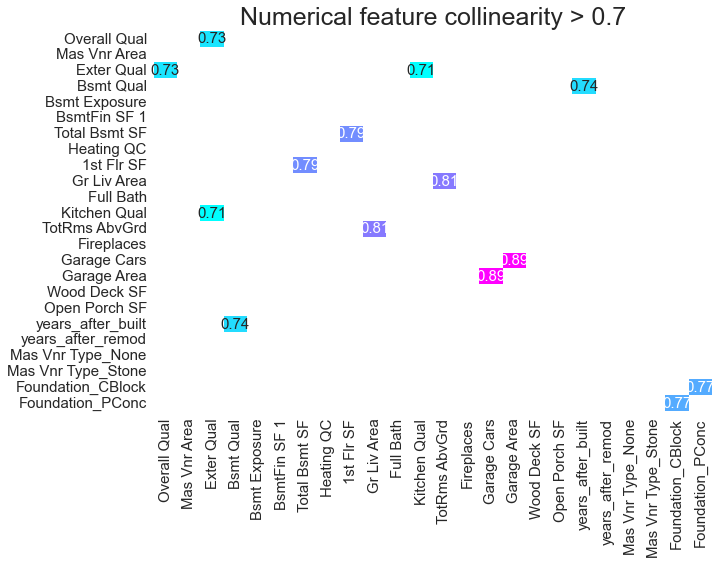

In [24]:
corr_features = transformed_houses.corr().abs().drop('SalePrice').drop('SalePrice', axis=1)

corr_features_above_07 = corr_features[(corr_features>0.7) & (corr_features <1)]

sns.set_style('white')
plt.figure(figsize = (10,7))
sns.heatmap(corr_features_above_07, cmap='cool',
            annot=True, annot_kws={'size': 15}, fmt='.2f', 
            cbar=False)
plt.title('Numerical feature collinearity > 0.7', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


So, there are 7 pairs of highly correlated features.

In [25]:
#constructing a table of highly correlated table
corr_matrix = transformed_houses.corr().abs().drop("SalePrice").drop("SalePrice", axis =1)

all_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
             .stack().sort_values(ascending = False))

collinear_pairs = all_pairs[all_pairs > 0.7].to_frame().reset_index()
collinear_pairs.columns = ["Feature_1","Feature_2","Coef"]
print(collinear_pairs)

           Feature_1          Feature_2      Coef
0        Garage Cars        Garage Area  0.888866
1        Gr Liv Area      TotRms AbvGrd  0.806092
2      Total Bsmt SF         1st Flr SF  0.792227
3  Foundation_CBlock   Foundation_PConc  0.772233
4          Bsmt Qual  years_after_built  0.738789
5       Overall Qual         Exter Qual  0.732807
6         Exter Qual       Kitchen Qual  0.714582


From the plot and table, it seems that the feature "Exter Qual"  highly correlate with 2 other features.

Let's drop this feature from dataframe.

In [26]:
transformed_houses = transformed_houses.drop("Exter Qual", axis =1)
print("Number of features :", transformed_houses.shape[1])

Number of features : 24


Now we will update the table above and eliminate from each pair the feature that correlated less with the **"Saleprice"**        target variable.

In [27]:
#Reconstructing the table of the strongly collinear features
corr_matrix = transformed_houses.corr().abs().drop("SalePrice").drop("SalePrice", axis =1)

all_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
             .stack().sort_values(ascending = False))

collinear_pairs = all_pairs[all_pairs > 0.7].to_frame().reset_index()
collinear_pairs.columns = ["Feature_1","Feature_2","Coef"]
print(collinear_pairs)

# Comparing the correlation coefficients of collinear features with "SalePrice"
# and eliminating the feature with the lowest correlation coefficient.
for index, row in collinear_pairs.iterrows() :
    feature_1 = row["Feature_1"]
    feature_2 = row["Feature_2"]
    feature_1_coef = corr_price[feature_1]
    feature_2_coef = corr_price[feature_2]
    
    if feature_1_coef > feature_2_coef:
        transformed_houses=transformed_houses.drop(feature_2, axis =1)
    else:
        transformed_houses=transformed_houses.drop(feature_1, axis =1)
        
print("\nNumber of features :", transformed_houses.shape[1])
print("\n",transformed_houses.columns)


           Feature_1          Feature_2      Coef
0        Garage Cars        Garage Area  0.888866
1        Gr Liv Area      TotRms AbvGrd  0.806092
2      Total Bsmt SF         1st Flr SF  0.792227
3  Foundation_CBlock   Foundation_PConc  0.772233
4          Bsmt Qual  years_after_built  0.738789

Number of features : 19

 Index(['Overall Qual', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Exposure',
       'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC', 'Gr Liv Area',
       'Full Bath', 'Kitchen Qual', 'Fireplaces', 'Garage Cars',
       'Wood Deck SF', 'Open Porch SF', 'SalePrice', 'years_after_remod',
       'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Foundation_PConc'],
      dtype='object')


Let's see the raltionship of features with "SalePrice" graphically.

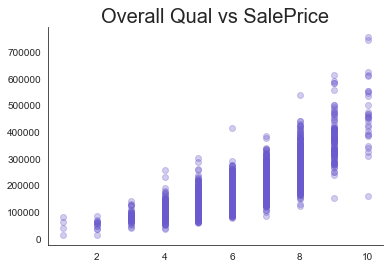

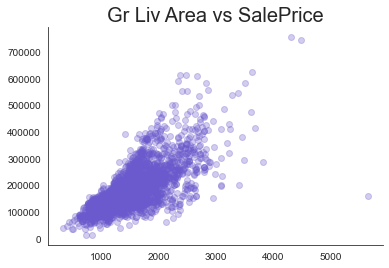

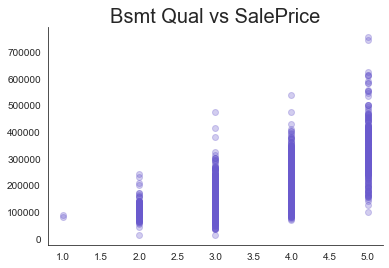

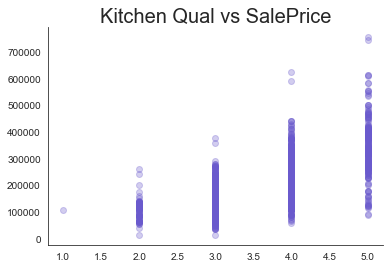

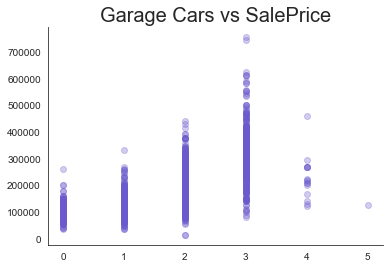

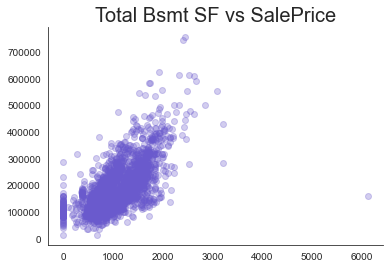

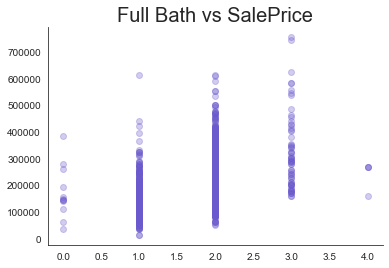

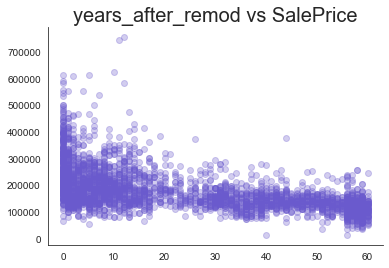

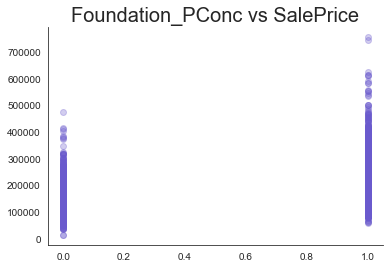

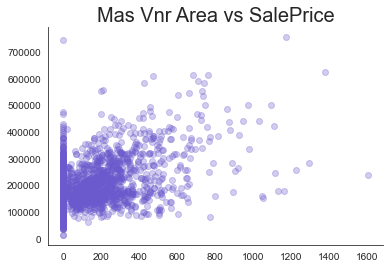

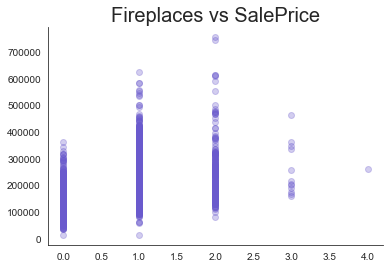

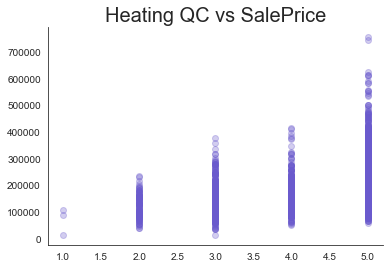

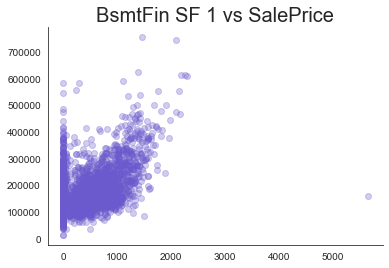

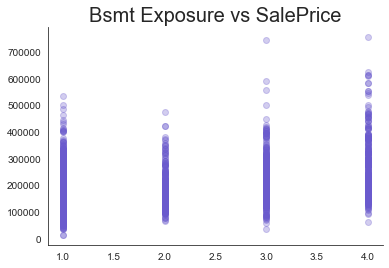

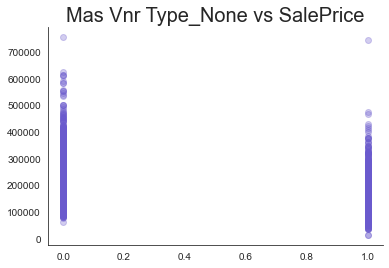

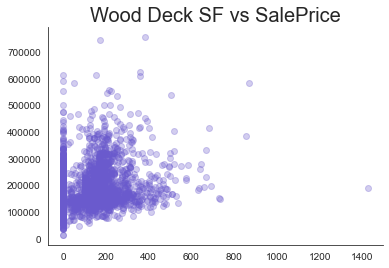

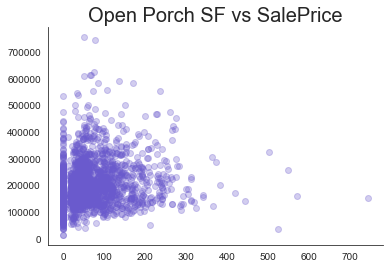

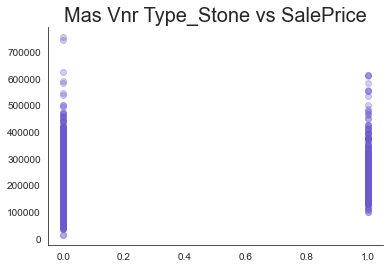

In [28]:
corr_price = transformed_houses.corr()["SalePrice"].abs().drop("SalePrice").sort_values(ascending = False)

for feature in corr_price.index :
    if feature in transformed_houses :
        plt.figure()
        plt.scatter(transformed_houses[feature],transformed_houses["SalePrice"],
                   color ="slateblue", alpha =0.3)
        plt.title('{} vs SalePrice'.format(feature), fontsize =20)
        sns.despine()

Majority of continuous features have upper outliers.

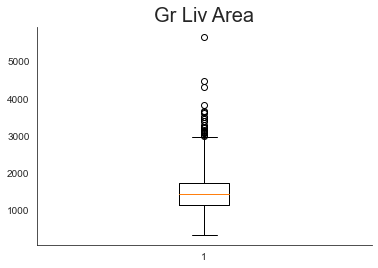

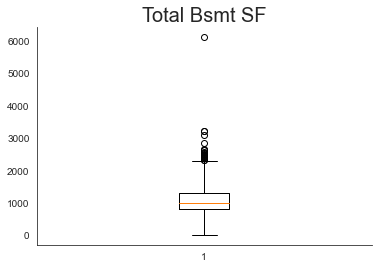

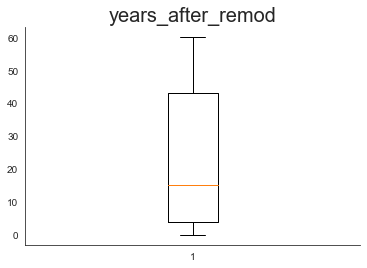

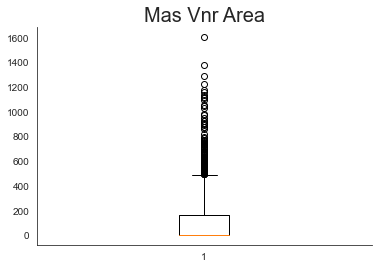

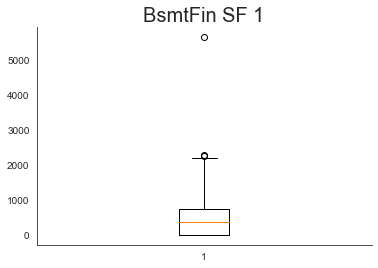

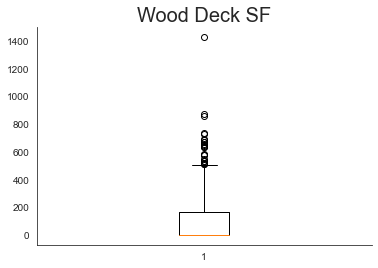

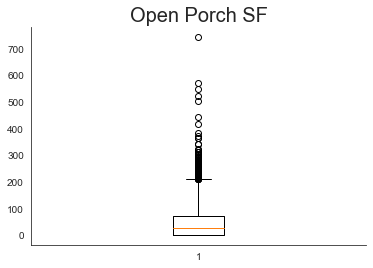

In [29]:
for feature in corr_price.index :
    if feature in transformed_houses and transformed_houses[feature].nunique()>10 :
        plt.figure()
        plt.boxplot(transformed_houses[feature], whis =2)
        plt.title(feature, fontsize =20)
        sns.despine()
# For plotting box plot we used the whisker coefficient value of 2, insted of 1.5(which is usually used)
# sice the lower value gives too many outliers, resulting in removing upto 18% of all the rows.

Let's remove outliers and calculate remaining number of rows.

In [30]:
print("Number of rows before removing outliers :",transformed_houses.shape[0])
for feature in ["Gr Liv Area", "Total Bsmt SF","Mas Vnr Area","BsmtFin SF 1","Wood Deck SF","Open Porch SF"] :
    if feature in transformed_houses:
        Q1 = transformed_houses[feature].quantile(0.25) 
        Q3 = transformed_houses[feature].quantile(0.75) 
        IQR = Q3 - Q1
        transformed_houses = transformed_houses.drop(transformed_houses[transformed_houses[feature] > (Q3 + 2*IQR)].index)
transformed_houses = transformed_houses.reset_index(drop = True) 

print("Number of rows after removing outliers :",transformed_houses.shape[0])    
    
    

Number of rows before removing outliers : 2927
Number of rows after removing outliers : 2646


Now, we removed 281 rows(9.6% of all rows). Let's check the plots.

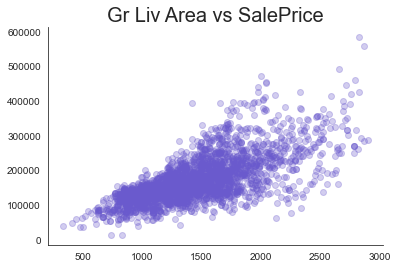

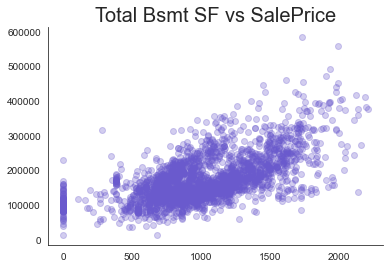

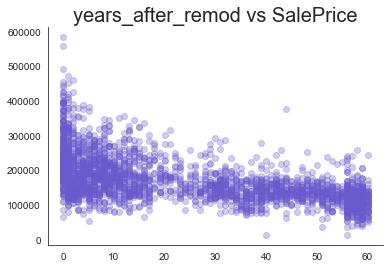

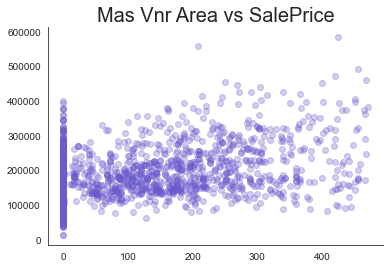

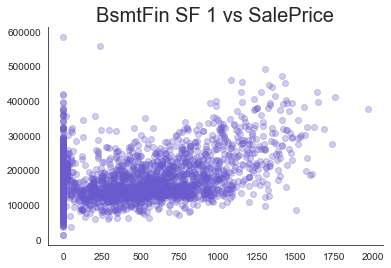

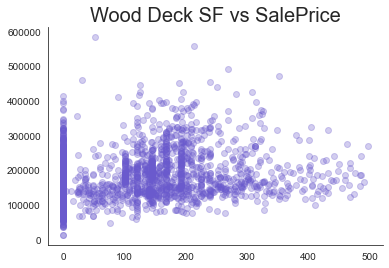

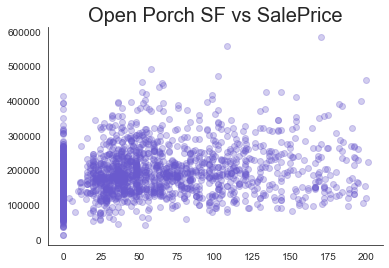

In [31]:

for feature in corr_price.index :
    if feature in transformed_houses and transformed_houses[feature].nunique() >10 :
        plt.figure()
        plt.scatter(transformed_houses[feature],transformed_houses["SalePrice"],
                   color ="slateblue", alpha =0.3)
        plt.title('{} vs SalePrice'.format(feature), fontsize =20)
        sns.despine()

Now, we will unite all the steps of feature selection in one function introducing some parameters for possible cut-off values. Also, we will introduce a new parameter initial meaning whether the input dataframe is going to be used for model training and testing **(initial=True)** or for real predicting prices on some new unlabeled data **(initial=False)**. In the second case, for example, we're not going to check the feature variance, unique values, etc., just to prepare the data properly to be used in a predictive model.

In [32]:
def select_features(df, initial = True , unique_cats_cutoff = 10,
                    most_freq_feature_cutoff= 95, corr_price_cutoff =0.3, collinear_cutoff =0.7,
                   whisker_coef =2):
     # ISolating categorical features
    categorical_features = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 
                        'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                        'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                        'Foundation', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical']
    if initial:
        #creating a list of categorical features with number of unique categories higher than selected cutoff
        above_unique_cats = [feature for feature in categorical_features if df[feature].nunique()> unique_cats_cutoff]
        
        # dropping such features
        if len(above_unique_cats) > 0:
            df = df.drop(above_unique_cats, axis =1)
            
        # updating the list of categorical features    
        categorical_features = list(set(categorical_features) - set(above_unique_cats))
        
        # creating a list of features having low variance
        low_var_features = []
        for feature in categorical_features :
            most_frequent_feature = df[feature].value_counts(normalize = True)*100
            if most_frequent_feature[0] > most_freq_feature_cutoff :
                low_var_features.append(feature)
                
         # dropping such features       
        if len(low_var_features) > 0 :   
            df = df.drop(low_var_features, axis =1)
            
        # updating the list of categoricl features
        categorical_features = list(set(categorical_features) - set(low_var_features))
        
        #Mapping the remaining categorical features into "category" dtype
        for feature in categorical_features :
            df[feature] = df[feature].astype("category")
        # creating dummy columns
        dummy = pd.get_dummies(df.select_dtypes("category"))
        df =pd.concat([df,dummy], axis =1)
        df= df.drop(categorical_features, axis =1)
        
        # isolating ordinal features
        ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 
                    'Bsmt Cond', 'Bsmt Exposure', 'Heating QC', 'BsmtFin Type 1', 'Kitchen Qual',
                    'Functional', 'Paved Drive']
        
        # Mapping ordinal features
        feature_mapping = {'Lot Shape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
                   'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1},
                   'Land Slope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
                   'Exter Qual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Exter Cond' :{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Bsmt Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Heating QC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Bsmt Exposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1},
                   'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1},
                   'Kitchen Qual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                   'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
                   'Paved Drive':  {'Y': 3, 'P': 2, 'N': 1},
                   'Bsmt Qual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} 
                  }
        
        for key in feature_mapping:
            df[key] = df[key].map(feature_mapping[key])
            
        if initial :
            # calculating correlation coefficient of features with saleprice
            corr_price = df.corr()['SalePrice'].abs().drop('SalePrice').sort_values(ascending = False)
            drop_num_feat = corr_price[corr_price < corr_price_cutoff].index
            # dropping all the featurs having correaltion coefficient less than selected cutoff
            df = df.drop(drop_num_feat,axis=1)
            
        def select_collinear_features() :
            corr_matrix = df.corr().abs().drop("SalePrice").drop("SalePrice", axis =1)

            all_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                          .stack().sort_values(ascending = False))
 
            collinear_pairs = all_pairs[all_pairs >collinear_cutoff ].to_frame().reset_index()
            collinear_pairs.columns = ["Feature_1","Feature_2","Coef"]
            return collinear_pairs
        
        collinear_pairs = select_collinear_features()
        
        # dropping features collinear with more than one  features
        intersect = list(set(collinear_pairs['Feature_1']) & set(collinear_pairs['Feature_2']))
        df =df.drop(intersect, axis =1)
        
        # Reselecting the features
        collinear_pairs = select_collinear_features()
        
        # comparing the correlation coefficients of collinear features with SalePrice 
        # and eliminating the one with lowest correlation coefficient.
        for index, row in collinear_pairs.iterrows() :
            feature_1 = row["Feature_1"]
            feature_2 = row["Feature_2"]
            feature_1_coef = corr_price[feature_1]
            feature_2_coef = corr_price[feature_2]
    
            if feature_1_coef > feature_2_coef:
                df=df.drop(feature_2, axis =1)
            else:
                df= df.drop(feature_1, axis =1)
        # Removing upper outliers.        
        corr_price = df.corr()["SalePrice"].abs().drop("SalePrice").sort_values(ascending = False)
        for feature in ["Gr Liv Area", "Total Bsmt SF","Mas Vnr Area","BsmtFin SF 1","Wood Deck SF","Open Porch SF"] :
            if feature in df:
                Q1 = df[feature].quantile(0.25) 
                Q3 = df[feature].quantile(0.75) 
                IQR = Q3 - Q1
                df= df.drop(df[df[feature] > (Q3 + whisker_coef*IQR)].index)
        df = df.reset_index(drop = True) 
 
    if not initial :
        df = df.drop("SalePrice", axis =1)
        
    return df
        
        

        
        
     
            
            
        
        
        
        


        
        
        

    
    

## Train And Test

Now, let's update the train_and_test function that we created earlier.

In [33]:
def train_and_test(df, k=0, rand_state = 1) :
     
        lr =LinearRegression()
        
        features = df.columns.drop("SalePrice")
        
        X = df[features]
        y = df["SalePrice"]
        
        if k<= 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5, random_state = rand_state)
            
            # Performing holdout validation
            if k == 0:
                lr.fit(X_train ,y_train)
                prediction = lr.predict(X_test)
                rmse = np.sqrt(mean_squared_error(y_test, prediction))
                print("RMSE :", rmse)
                return ''
            # Performing simple cross validation
            else :
                lr.fit(X_train ,y_train)
                prediction_1 = lr.predict(X_test)
                rmse_1 = np.sqrt(mean_squared_error(y_test, prediction_1))
                
                lr.fit(X_test , y_test)
                prediction_2 = lr.predict(X_train)
                rmse_2 = np.sqrt(mean_squared_error(y_train, prediction_2))
                
                print("RMSE1: ",rmse_1, "RMSE2:",rmse_2)
                
                rmse_mean = np.mean([rmse_1, rmse_2])
                print("RMSE :", rmse_mean)
                
                return ''
        
        # Performing k-fold cross validation
        else :
            kf = KFold(n_splits =k , shuffle = True , random_state = rand_state)
            rmse_values =[]
            
            for train_index , test_index in kf.split(X) :
                X_train , X_test = X.iloc[train_index,:] , X.iloc[test_index,:]
                y_train ,y_test = y[train_index] , y[test_index]
                
                
                lr.fit(X_train , y_train)
                prediction = lr.predict(X_test)
                
                rmse = np.sqrt(mean_squared_error(y_test , prediction))
                rmse_values.append(rmse)
                
            print("RMSE values :", rmse_values) 
            
            rmse_mean = np.mean(rmse_values)
            
            print("RMSE :", rmse_mean)
            
            return ''
        
print(train_and_test(transformed_houses , k=0), "\n---------------------") 
print(train_and_test(transformed_houses , k=1),"\n----------------------")
print(train_and_test(transformed_houses , k=5))    

RMSE : 25197.782549657648
 
---------------------
RMSE1:  25197.782549657648 RMSE2: 24471.304426322265
RMSE : 24834.543487989955
 
----------------------
RMSE values : [23502.716984173192, 25008.94523914633, 27308.237189291413, 23108.812709915634, 24016.818021853465]
RMSE : 24589.10602887601



In [34]:
transformed_houses = transform_features()
transformed_houses = select_features(transformed_houses)
print(train_and_test(transformed_houses , k=0), "\n---------------------") 
print(train_and_test(transformed_houses , k=1),"\n----------------------")
print(train_and_test(transformed_houses , k=5))    

RMSE : 25197.782549657648
 
---------------------
RMSE1:  25197.782549657648 RMSE2: 24471.304426322265
RMSE : 24834.543487989955
 
----------------------
RMSE values : [23502.716984173192, 25008.94523914633, 27308.237189291413, 23108.812709915634, 24016.818021853465]
RMSE : 24589.10602887601



Below is the comparison of new RMSE values with previous one, old dataframe with 113 numerical features.

| k | RMSE_before | RMSE_after | Decease % |
|---|-------------|------------|-----------|
| 0 |   31,458    |    25,198  |   20      |      
| 1 |   29,181    |    24,835  |   15      |
| 5 |   28,348    |    24,589  |   13      |
      

Let's try the entire pipeline of the functions **transform_features()**, **select_features()**, and **train_and_test()** with variation in the parameters.



In [35]:
transformed_houses_1 = transform_features(nan_cutoff = 7)
transformed_houses_1 = select_features(transformed_houses_1, unique_cats_cutoff = 8,
                       most_freq_feature_cutoff= 90, corr_price_cutoff =0.4, collinear_cutoff =0.75,
                       whisker_coef =2.1)
train_and_test(transformed_houses_1 , k =4)   



RMSE values : [24729.942314394684, 25728.608975148654, 25451.741350764998, 25093.99089849838]
RMSE : 25251.070884701676


''

## Conclusion

In this project, we cleaned, wrangled, and transformed the housing data for the city of Ames, Iowa, the USA (2006-2010) for further using it to predict house sale prices with a linear regression algorithm of machine learning.

* We created a pipeline of 3 functions to efficiently perform all necessary manipulations.In addition, we applied 3 different approaches for train-test validation including holdout validation, simple cross-validation, and k-fold cross-validation.


* We managed to significantly reduce the error of house price prediction due to proper feature engineering, selection, and preparation for further modeling.


